In [1]:
import os
import pickle

import pandas as pd
import numpy as np
import researchpy as rp
import scipy.stats as stats

import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

import matplotlib as mpl

import warnings
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
pd.options.display.max_rows = 4000
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

## Import local class
from apply_brf import SplitTrainAndPredict

In [2]:
## Define your path
PATH = r"D:\francisco_madrigal\Desktop\Tesis\modelo"

def create_path(file_path, path=PATH):
    
    return os.path.join(path, file_path)

In [3]:
## Open dictionary of crimes
crime_cat_file = open(create_path("crime_cat_dict.pkl"), "rb")
crime_cat_dict = pickle.load(crime_cat_file)

In [4]:
## Read neighborhoods DataFrame for later use
colonias = gpd.read_file(create_path(r"colonias_fixed\colonias_fixed.shp"))

## Declare the used coordinate system
colonias.crs = "epsg:4326"

## Print Coordinate Reference System (CRS)
# This is importan to homologue all crs from other georeferenced DataFrames
colonias.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Ver https://imbalanced-learn.org/stable/index.html

## Data Transformation

In [5]:
## Read DataFrame
matrix_crimes = pd.read_csv(create_path("base_crimenes.csv"),
                            parse_dates =['Hora'])

## Create dummies
#matrix_crimes = pd.get_dummies(matrix_crimes, columns=['id_colonia', 'day_period', 'dia_semana', 'month'],
#                               prefix=["colonia", "day_per", "weekday", "month"], sparse=True)
            

## Show the balance of crimes DataFrame
matrix_crimes.value_counts(subset=["crimen"], normalize=True).to_frame('Relative').merge(
    
    matrix_crimes.value_counts(subset=["crimen"]).to_frame('Absolute'),
    on='crimen')

,Relative,Absolute
crimen,,
0,0.985228,11618371
1,0.014772,174197


In [6]:
## Merge to locate the Municipality for each nieghborhood
matrix_crimes = matrix_crimes.merge(colonias[['id_colonia', 'alcaldi']],
                                   how='left',
                                   on='id_colonia')

## Create an empty DataFrame to save the predictions for each municipality
results_brf = pd.DataFrame({})

## Create an empty DataFrame to save all scores of applied models
all_scores = pd.DataFrame({})

## Create an empty DataFrame to save tran-test-split results
train_test_table = pd.DataFrame({})

In [7]:
## Drop variables that can't be used to predict on future dates
matrix_crimes = matrix_crimes.drop(['TEMP','PRCP','CO','O3','PM10','change_accidents'], axis=1)

### Apply Balanced Random Forest

----------------------------------------------------------------------------------------------------
|MIGUEL HIDALGO|


Total features:  141
Observations:  540986


***TRAIN TABLE***
   Relative  Absolute
0  0.977866    529012
1  0.022134     11974


***TEST TABLE***
   Relative  Absolute
0  0.984538     31900
1  0.015462       501
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.768



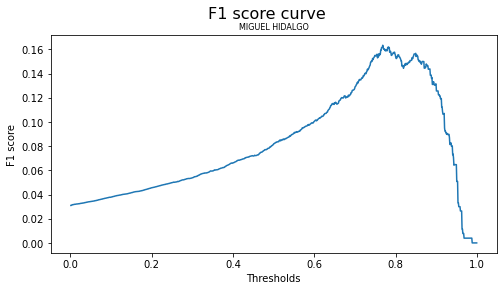

Results of Balanced Random Forest:

   F1 Score: 0.16347237880496054
   Accuracy: 0.9541989444770224
   Balanced Accuracy: 0.6270303280586162
   Average Precision Score: 0.08386065126334943


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     31900
           1       0.11      0.29      0.16       501

    accuracy                           0.95     32401
   macro avg       0.55      0.63      0.57     32401
weighted avg       0.98      0.95      0.96     32401

***************************


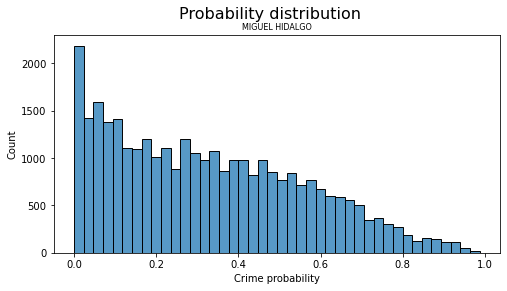

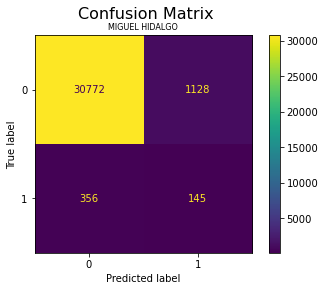

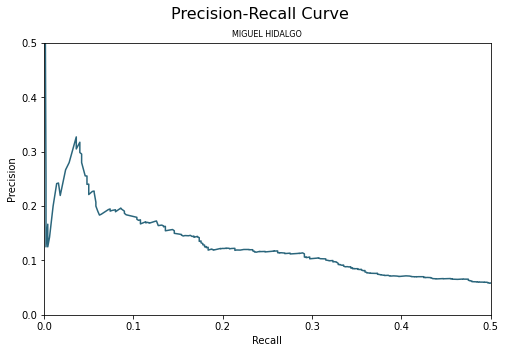

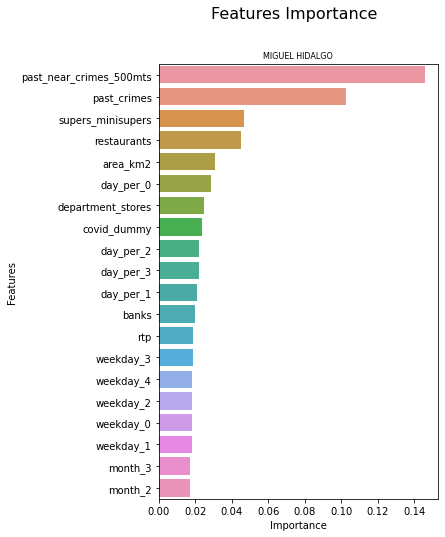

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|COYOACAN|


Total features:  207
Observations:  945772


***TRAIN TABLE***
   Relative  Absolute
0  0.990249    936550
1  0.009751      9222


***TEST TABLE***
   Relative  Absolute
0  0.993084     56285
1  0.006916       392
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.884



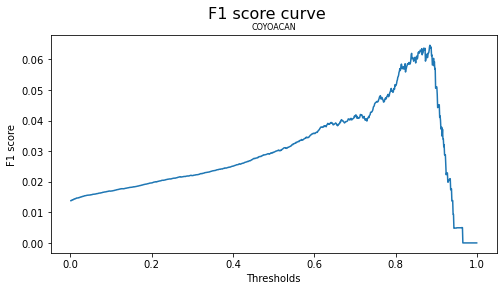

Results of Balanced Random Forest:

   F1 Score: 0.06465997770345597
   Accuracy: 0.9851968170510084
   Balanced Accuracy: 0.5327613158615139
   Average Precision Score: 0.02278759579953977


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56285
           1       0.06      0.07      0.06       392

    accuracy                           0.99     56677
   macro avg       0.53      0.53      0.53     56677
weighted avg       0.99      0.99      0.99     56677

***************************


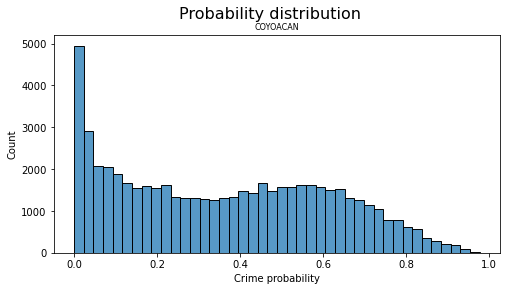

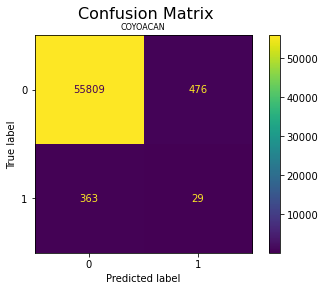

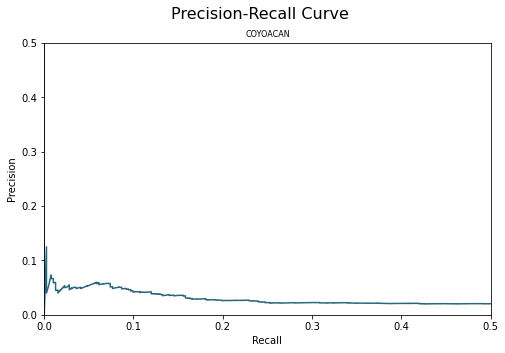

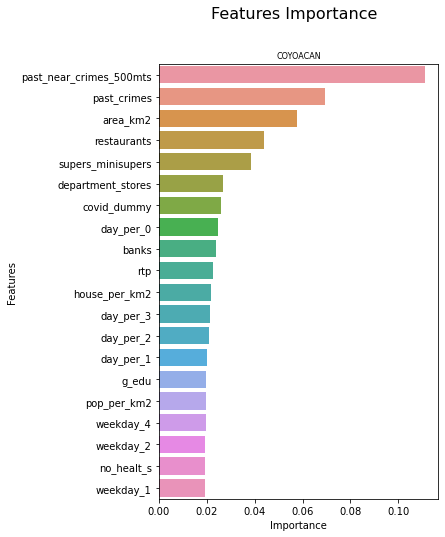

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|VENUSTIANO CARRANZA|


Total features:  134
Observations:  497730


***TRAIN TABLE***
   Relative  Absolute
0  0.978695    487126
1  0.021305     10604


***TEST TABLE***
   Relative  Absolute
0  0.986114     29401
1  0.013886       414
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.756



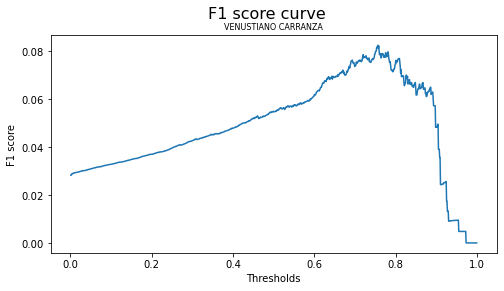

Results of Balanced Random Forest:

   F1 Score: 0.08234126984126984
   Accuracy: 0.9379506959584102
   Balanced Accuracy: 0.5744090912153075
   Average Precision Score: 0.039183499528581515


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29401
           1       0.05      0.20      0.08       414

    accuracy                           0.94     29815
   macro avg       0.52      0.57      0.53     29815
weighted avg       0.98      0.94      0.96     29815

***************************


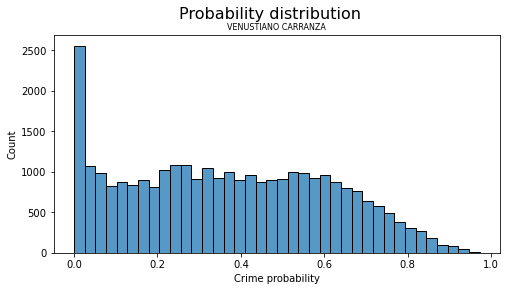

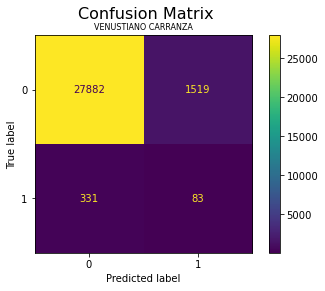

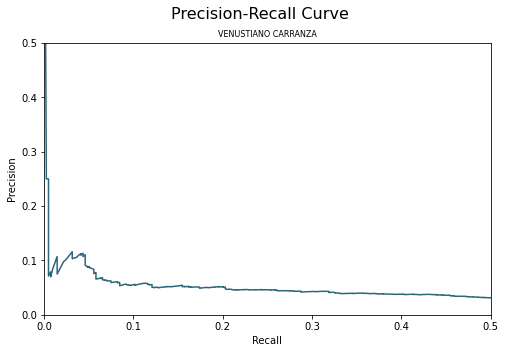

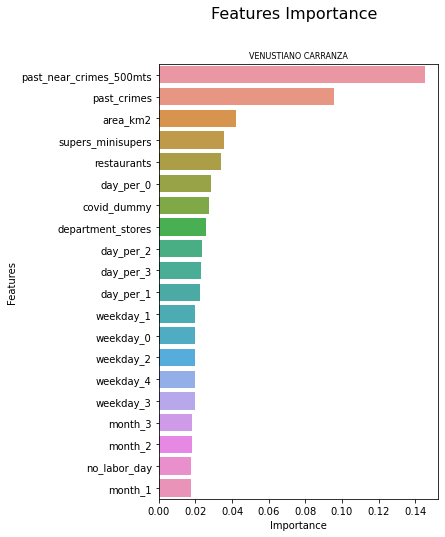

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|LA MAGDALENA CONTRERAS|


Total features:  105
Observations:  319293


***TRAIN TABLE***
   Relative  Absolute
0  0.994153    317426
1  0.005847      1867


***TEST TABLE***
   Relative  Absolute
0  0.994409     19030
1  0.005591       107
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.85



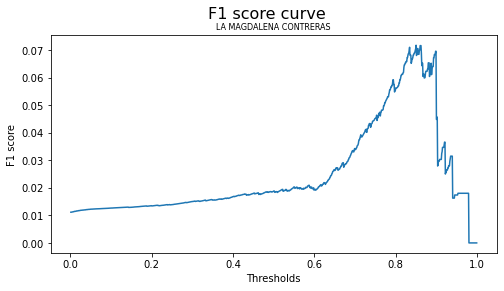

Results of Balanced Random Forest:

   F1 Score: 0.07174887892376682
   Accuracy: 0.978366515127763
   Balanced Accuracy: 0.5662797550350896
   Average Precision Score: 0.020297586740802915


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19030
           1       0.05      0.15      0.07       107

    accuracy                           0.98     19137
   macro avg       0.52      0.57      0.53     19137
weighted avg       0.99      0.98      0.98     19137

***************************


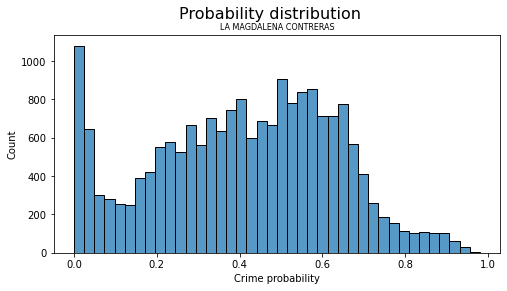

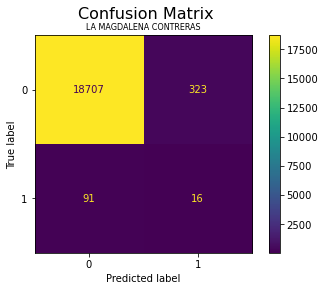

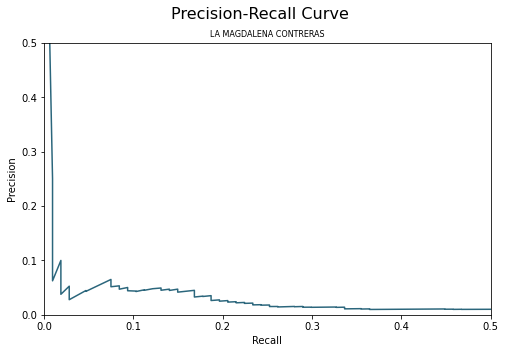

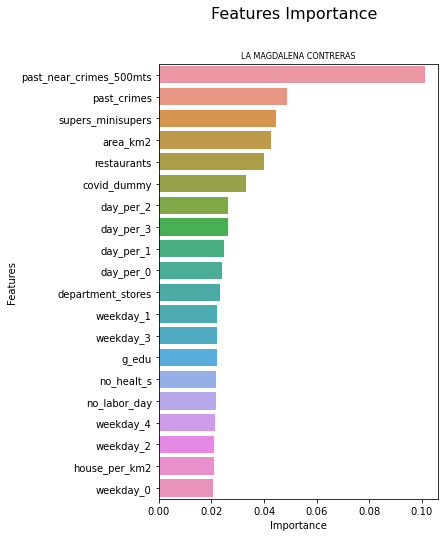

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|BENITO JUAREZ|


Total features:  117
Observations:  393261


***TRAIN TABLE***
   Relative  Absolute
0    0.9743    383154
1    0.0257     10107


***TEST TABLE***
   Relative  Absolute
0  0.983911     23177
1  0.016089       379
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.666



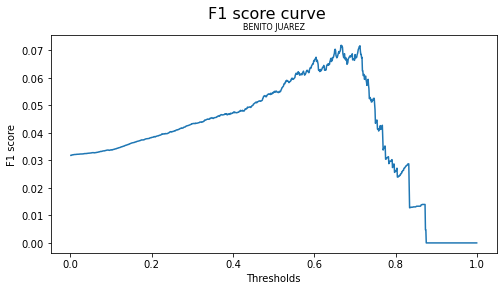

Results of Balanced Random Forest:

   F1 Score: 0.0718676122931442
   Accuracy: 0.9166666666666666
   Balanced Accuracy: 0.5644524875277248
   Average Precision Score: 0.030996115604147


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     23177
           1       0.04      0.20      0.07       379

    accuracy                           0.92     23556
   macro avg       0.51      0.56      0.51     23556
weighted avg       0.97      0.92      0.94     23556

***************************


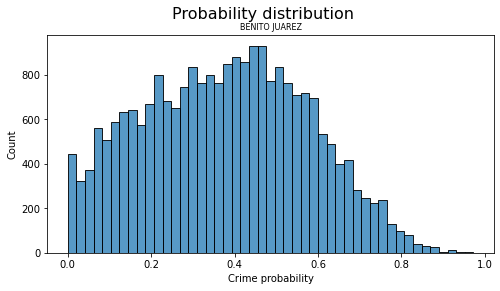

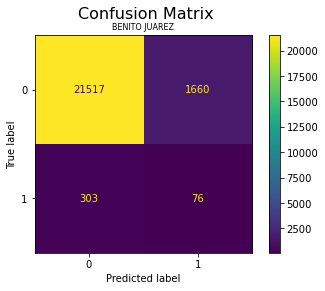

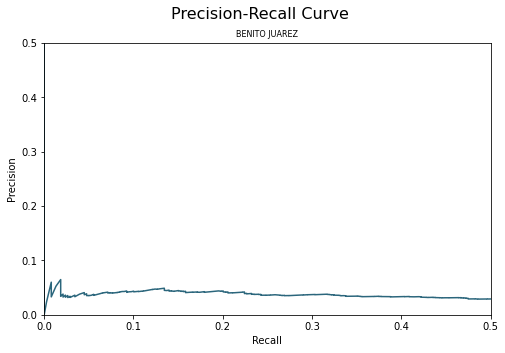

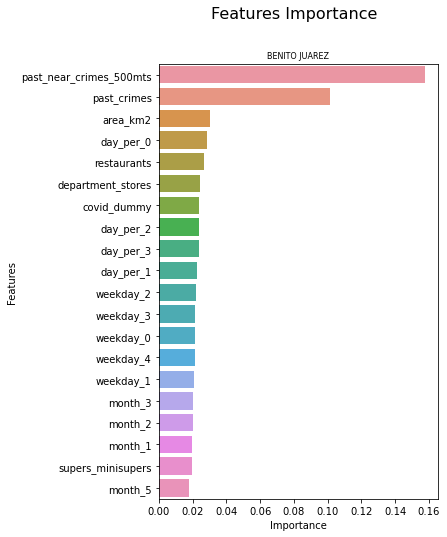

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|GUSTAVO A. MADERO|


Total features:  285
Observations:  1424883


***TRAIN TABLE***
   Relative  Absolute
0  0.986644   1405852
1  0.013356     19031


***TEST TABLE***
   Relative  Absolute
0  0.991708     84678
1  0.008292       708
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.774



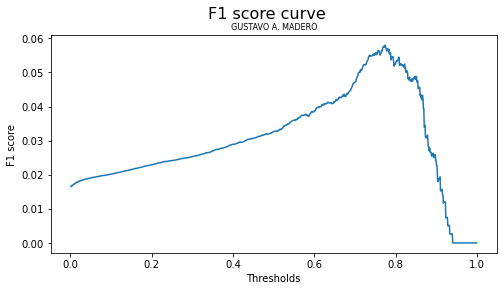

Results of Balanced Random Forest:

   F1 Score: 0.05798394290811775
   Accuracy: 0.95053053193732
   Balanced Accuracy: 0.5702792953245415
   Average Precision Score: 0.022456746945845686


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     84678
           1       0.03      0.18      0.06       708

    accuracy                           0.95     85386
   macro avg       0.51      0.57      0.52     85386
weighted avg       0.98      0.95      0.97     85386

***************************


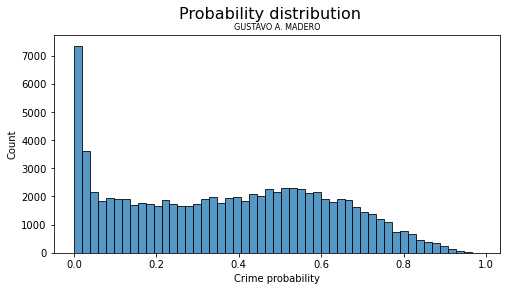

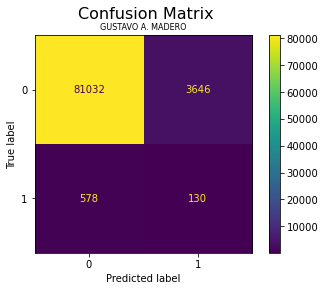

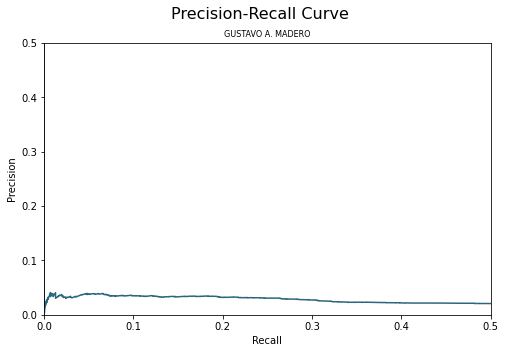

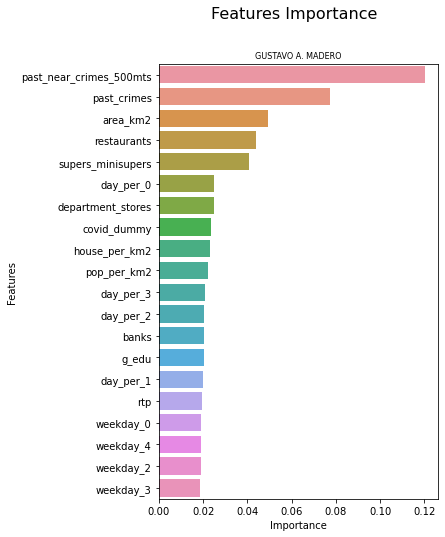

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|TLALPAN|


Total features:  230
Observations:  1086890


***TRAIN TABLE***
   Relative  Absolute
0  0.992628   1078877
1  0.007372      8013


***TEST TABLE***
   Relative  Absolute
0  0.994166     64760
1  0.005834       380
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.833



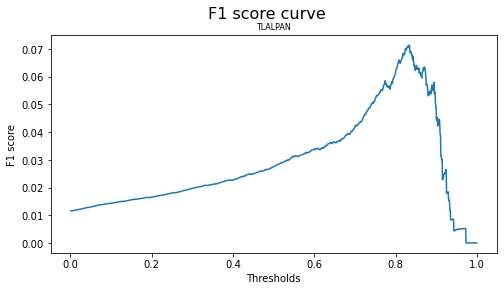

Results of Balanced Random Forest:

   F1 Score: 0.07140115163147794
   Accuracy: 0.9628645993245317
   Balanced Accuracy: 0.6059076427944475
   Average Precision Score: 0.024049655175418697


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     64760
           1       0.04      0.24      0.07       380

    accuracy                           0.96     65140
   macro avg       0.52      0.61      0.53     65140
weighted avg       0.99      0.96      0.98     65140

***************************


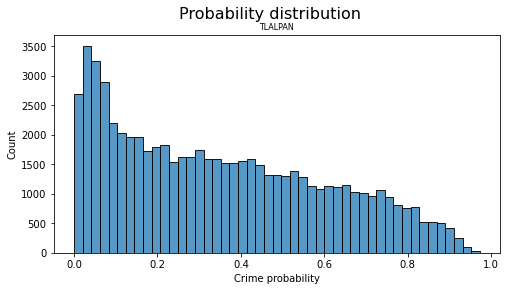

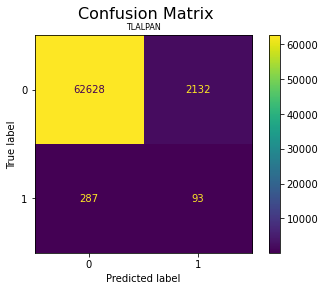

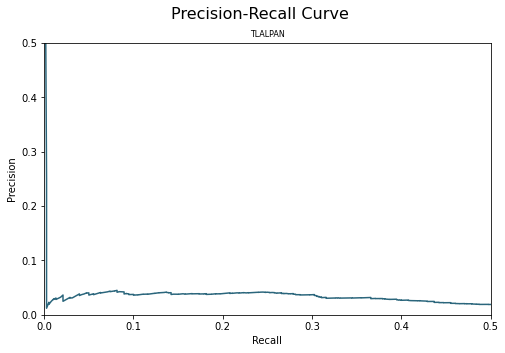

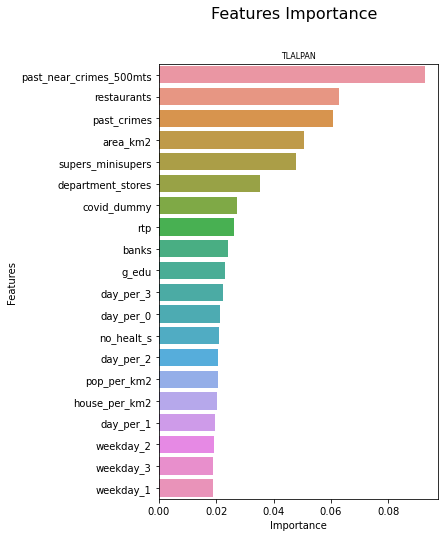

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|AZCAPOTZALCO|


Total features:  164
Observations:  681699


***TRAIN TABLE***
   Relative  Absolute
0  0.987672    673295
1  0.012328      8404


***TEST TABLE***
   Relative  Absolute
0  0.992387     40539
1  0.007613       311
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.719



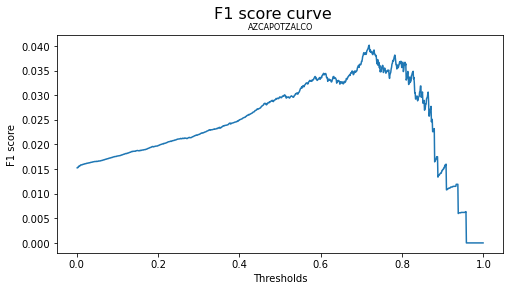

Results of Balanced Random Forest:

   F1 Score: 0.04014496793978255
   Accuracy: 0.9157160342717259
   Balanced Accuracy: 0.576238125344583
   Average Precision Score: 0.017699553266912395


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     40539
           1       0.02      0.23      0.04       311

    accuracy                           0.92     40850
   macro avg       0.51      0.58      0.50     40850
weighted avg       0.99      0.92      0.95     40850

***************************


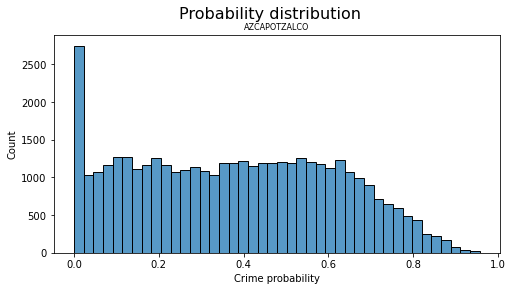

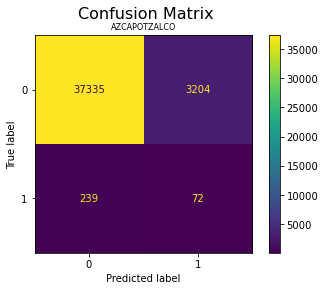

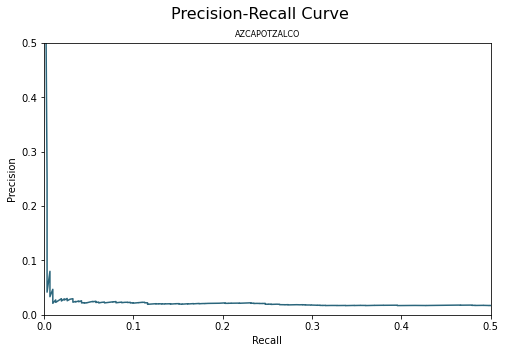

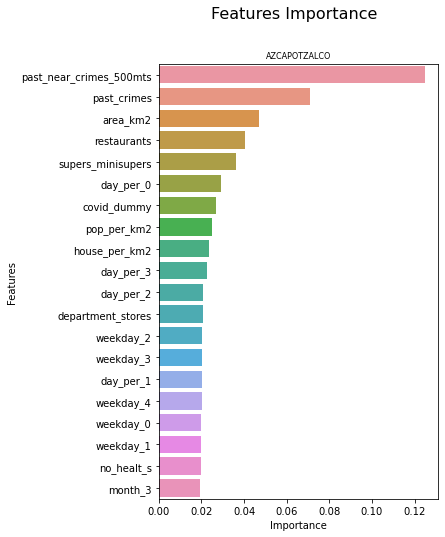

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|XOCHIMILCO|


Total features:  132
Observations:  485222


***TRAIN TABLE***
   Relative  Absolute
0  0.987216    479019
1  0.012784      6203


***TEST TABLE***
   Relative  Absolute
0  0.990473     28799
1  0.009527       277
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.838



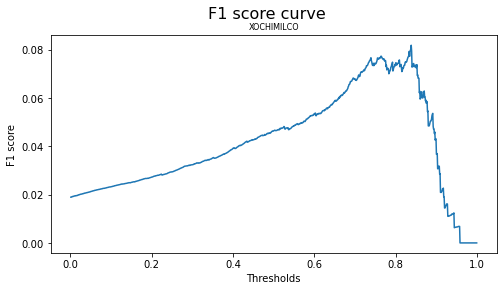

Results of Balanced Random Forest:

   F1 Score: 0.0818330605564648
   Accuracy: 0.9614114733801074
   Balanced Accuracy: 0.5747139735974085
   Average Precision Score: 0.03198609658962282


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28799
           1       0.05      0.18      0.08       277

    accuracy                           0.96     29076
   macro avg       0.52      0.57      0.53     29076
weighted avg       0.98      0.96      0.97     29076

***************************


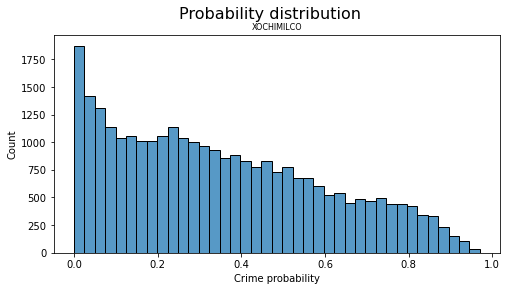

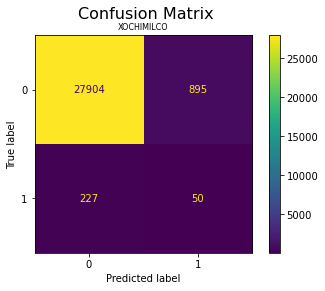

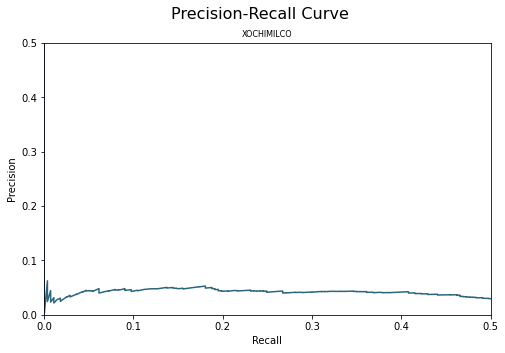

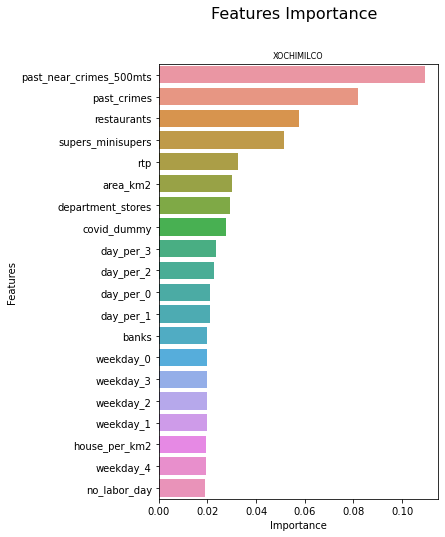

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|MILPA ALTA|


Total features:  64
Observations:  67556


***TRAIN TABLE***
   Relative  Absolute
0  0.988928     66808
1  0.011072       748


***TEST TABLE***
   Relative  Absolute
0  0.990366      4009
1  0.009634        39
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.809



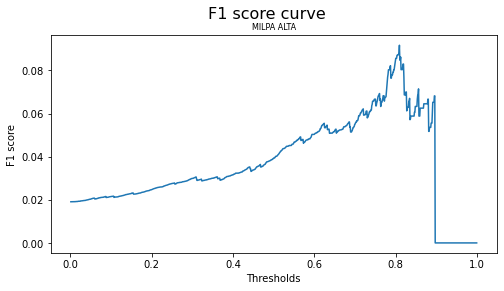

Results of Balanced Random Forest:

   F1 Score: 0.09166666666666667
   Accuracy: 0.9461462450592886
   Balanced Accuracy: 0.6173289585611861
   Average Precision Score: 0.03207319667703378


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4009
           1       0.05      0.28      0.09        39

    accuracy                           0.95      4048
   macro avg       0.52      0.62      0.53      4048
weighted avg       0.98      0.95      0.96      4048

***************************


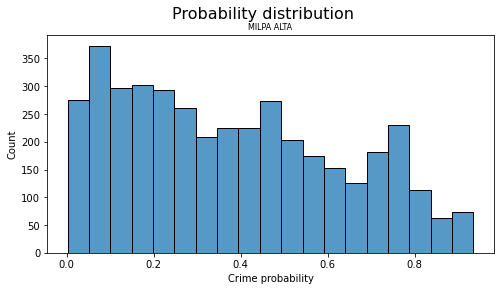

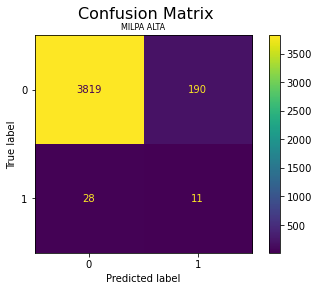

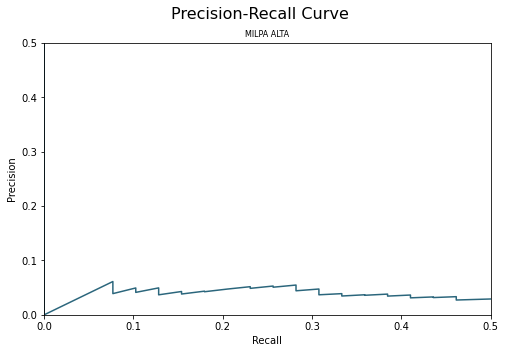

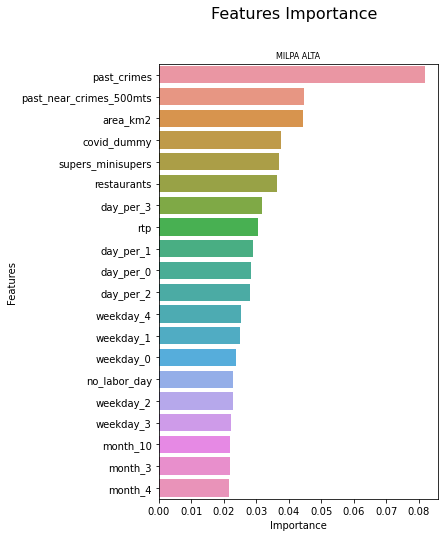

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|ALVARO OBREGON|


Total features:  303
Observations:  1535199


***TRAIN TABLE***
   Relative  Absolute
0   0.99287   1524253
1   0.00713     10946


***TEST TABLE***
   Relative  Absolute
0   0.99362     91419
1   0.00638       587
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.808



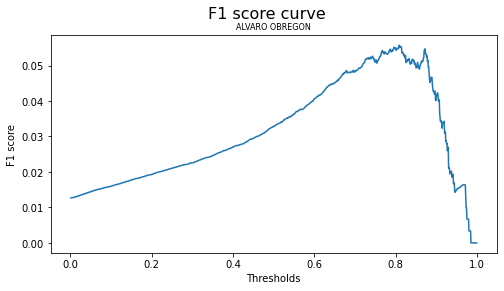

Results of Balanced Random Forest:

   F1 Score: 0.055710306406685235
   Accuracy: 0.9447318653131318
   Balanced Accuracy: 0.6023469021542665
   Average Precision Score: 0.025514016501036962


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     91419
           1       0.03      0.26      0.06       587

    accuracy                           0.94     92006
   macro avg       0.51      0.60      0.51     92006
weighted avg       0.99      0.94      0.97     92006

***************************


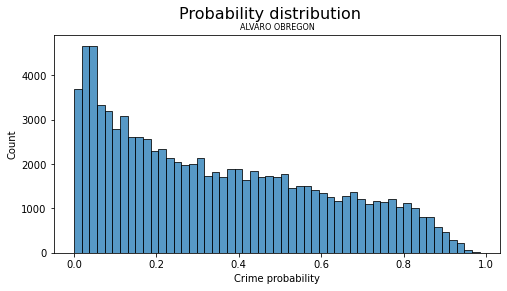

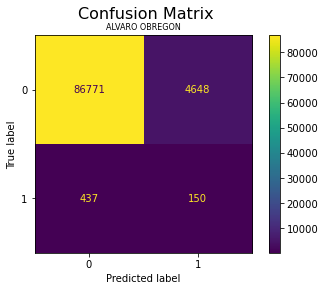

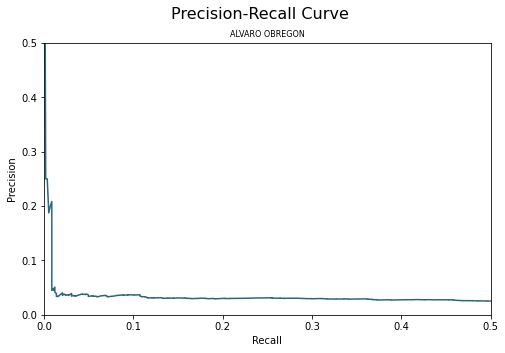

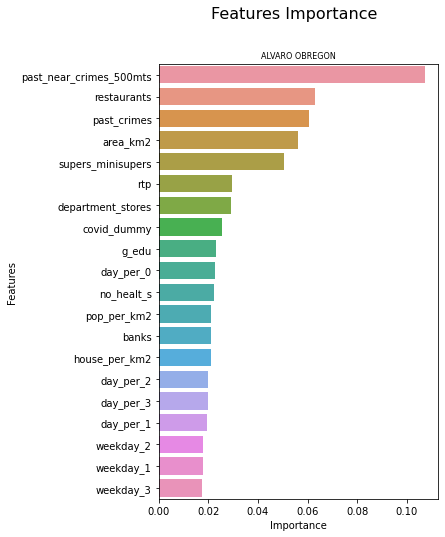

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|IZTACALCO|


Total features:  108
Observations:  338146


***TRAIN TABLE***
   Relative  Absolute
0  0.974135    329400
1  0.025865      8746


***TEST TABLE***
   Relative  Absolute
0  0.985235     19951
1  0.014765       299
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.672



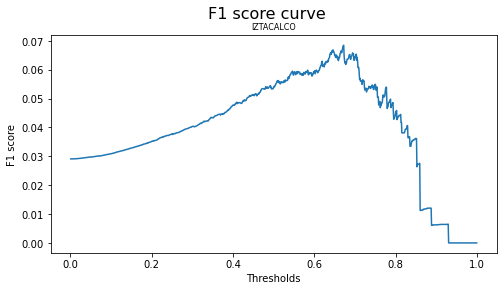

Results of Balanced Random Forest:

   F1 Score: 0.0684931506849315
   Accuracy: 0.9126913580246914
   Balanced Accuracy: 0.570251463912673
   Average Precision Score: 0.03198593070780491


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     19951
           1       0.04      0.22      0.07       299

    accuracy                           0.91     20250
   macro avg       0.51      0.57      0.51     20250
weighted avg       0.97      0.91      0.94     20250

***************************


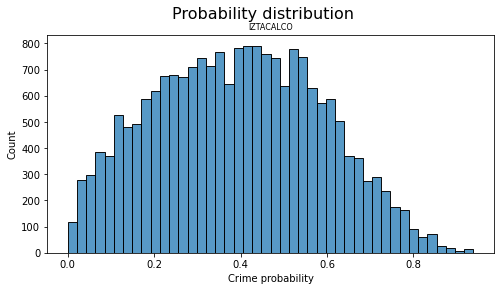

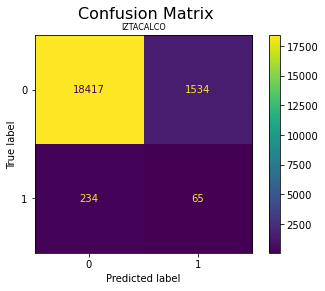

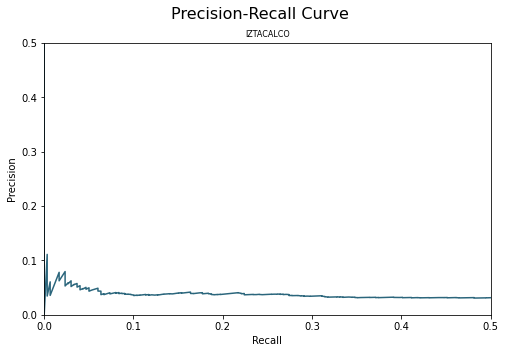

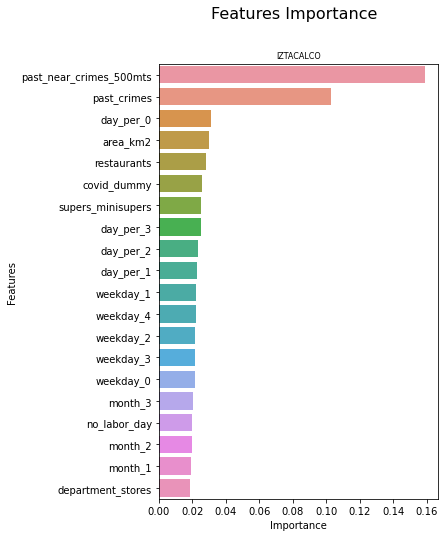

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|CUAUHTEMOC|


Total features:  116
Observations:  389216


***TRAIN TABLE***
   Relative  Absolute
0   0.94223    366731
1   0.05777     22485


***TEST TABLE***
   Relative  Absolute
0  0.971772     22549
1  0.028228       655
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.643



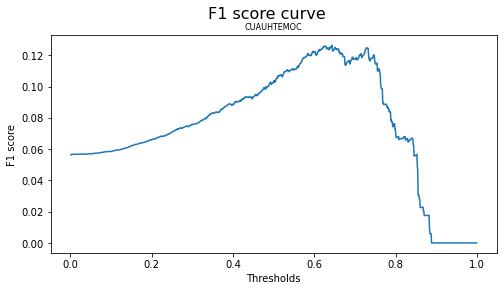

Results of Balanced Random Forest:

   F1 Score: 0.12642487046632125
   Accuracy: 0.9273401137734874
   Balanced Accuracy: 0.5675632270214586
   Average Precision Score: 0.06730610106650528


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     22549
           1       0.10      0.19      0.13       655

    accuracy                           0.93     23204
   macro avg       0.54      0.57      0.54     23204
weighted avg       0.95      0.93      0.94     23204

***************************


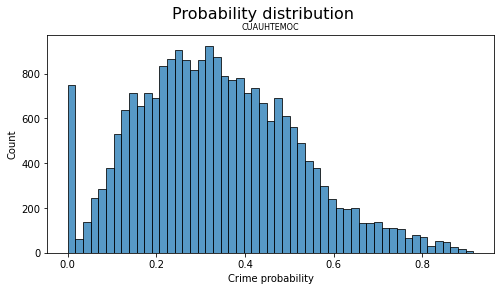

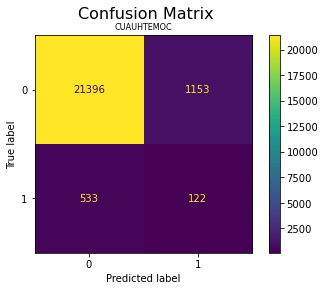

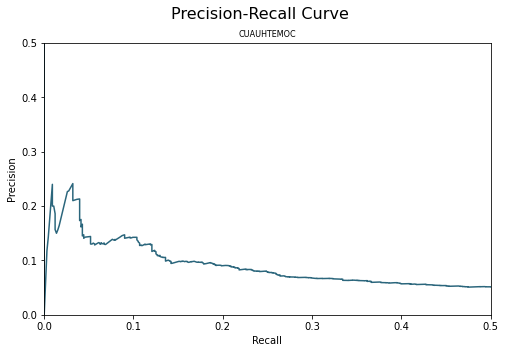

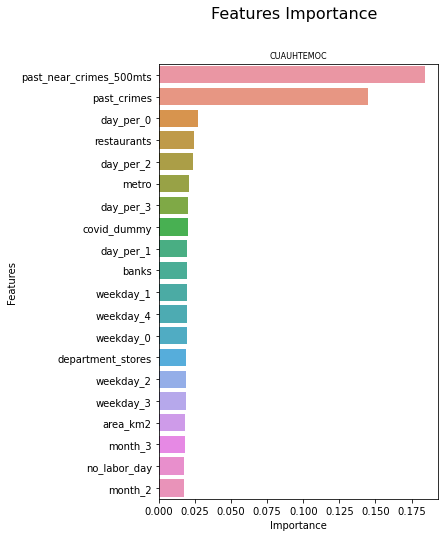

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|TLAHUAC|


Total features:  111
Observations:  356214


***TRAIN TABLE***
   Relative  Absolute
0  0.986357    351354
1  0.013643      4860


***TEST TABLE***
   Relative  Absolute
0  0.987447     21081
1  0.012553       268
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.76



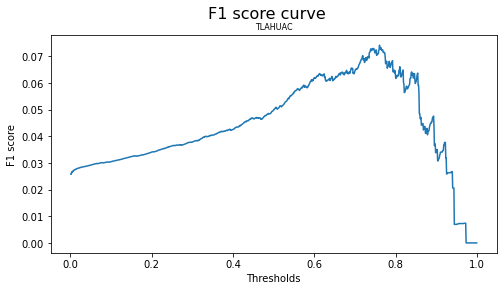

Results of Balanced Random Forest:

   F1 Score: 0.07422470767666497
   Accuracy: 0.9147032647899199
   Balanced Accuracy: 0.5976284969063888
   Average Precision Score: 0.03519237327568853


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     21081
           1       0.04      0.27      0.07       268

    accuracy                           0.91     21349
   macro avg       0.52      0.60      0.51     21349
weighted avg       0.98      0.91      0.94     21349

***************************


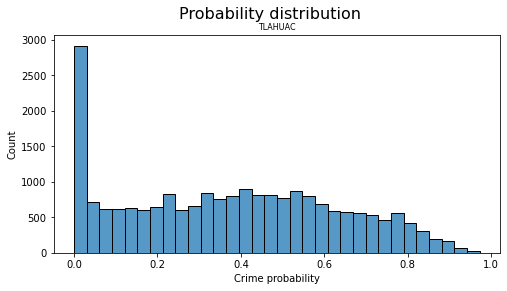

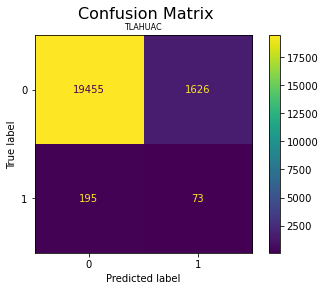

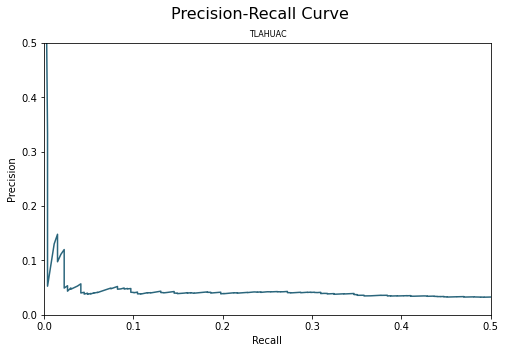

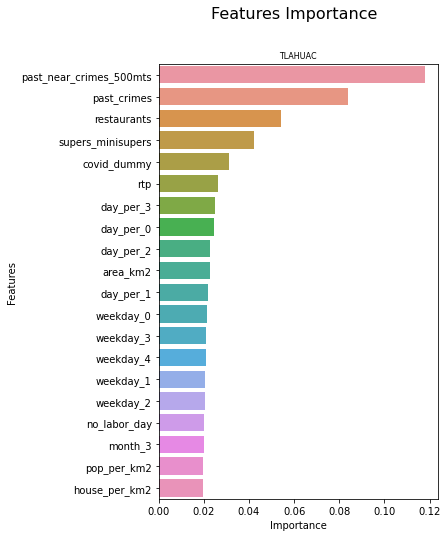

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|IZTAPALAPA|


Total features:  346
Observations:  1799905


***TRAIN TABLE***
   Relative  Absolute
0  0.981512   1766628
1  0.018488     33277


***TEST TABLE***
   Relative  Absolute
0  0.988706    106626
1  0.011294      1218
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.794



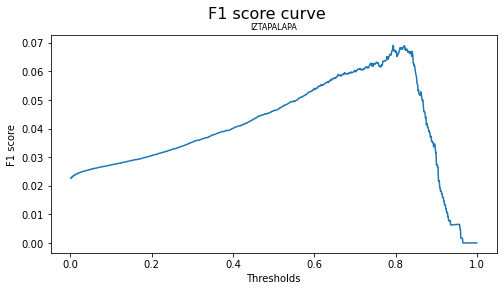

Results of Balanced Random Forest:

   F1 Score: 0.06911705952856571
   Accuracy: 0.9567894365935982
   Balanced Accuracy: 0.5540662870330151
   Average Precision Score: 0.031163005102540622


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    106626
           1       0.05      0.14      0.07      1218

    accuracy                           0.96    107844
   macro avg       0.52      0.55      0.52    107844
weighted avg       0.98      0.96      0.97    107844

***************************


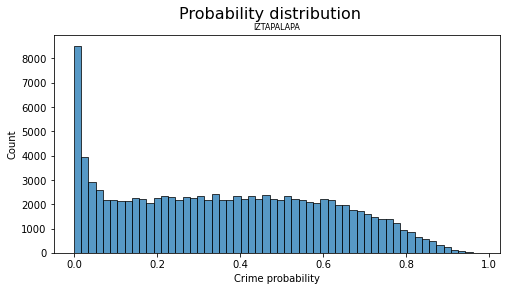

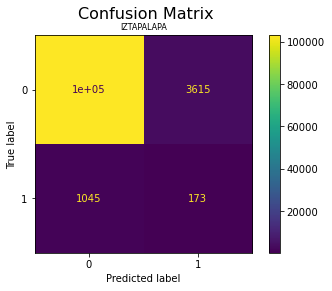

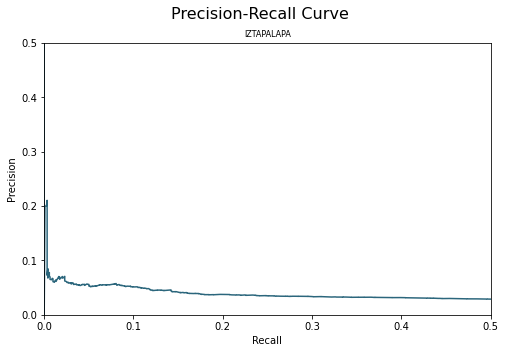

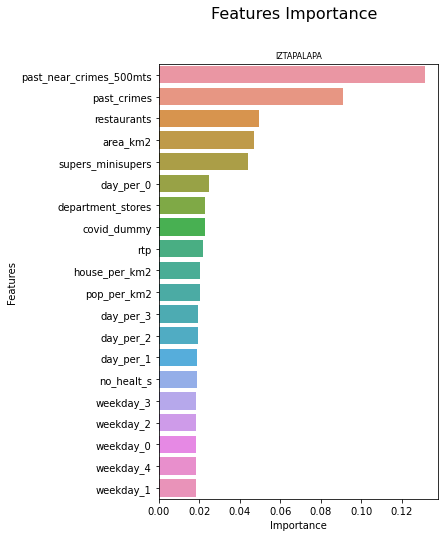

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|CUAJIMALPA DE MORELOS|


Total features:  96
Observations:  264032


***TRAIN TABLE***
   Relative  Absolute
0  0.995773    262916
1  0.004227      1116


***TEST TABLE***
   Relative  Absolute
0  0.996272     15766
1  0.003728        59
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 400
   Max features: sqrt
   Threshold that max F1: 0.872



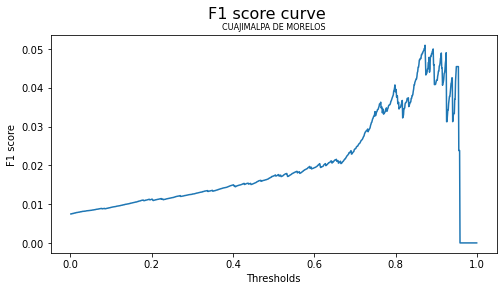

Results of Balanced Random Forest:

   F1 Score: 0.05095541401273886
   Accuracy: 0.9717535545023697
   Balanced Accuracy: 0.5890093894391923
   Average Precision Score: 0.016016883902367576


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15766
           1       0.03      0.20      0.05        59

    accuracy                           0.97     15825
   macro avg       0.51      0.59      0.52     15825
weighted avg       0.99      0.97      0.98     15825

***************************


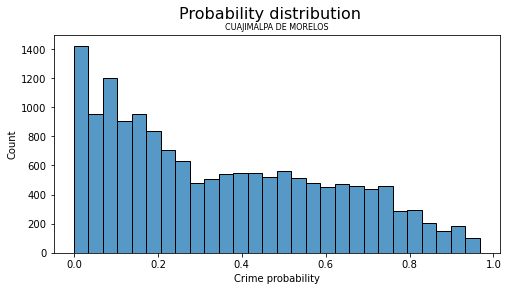

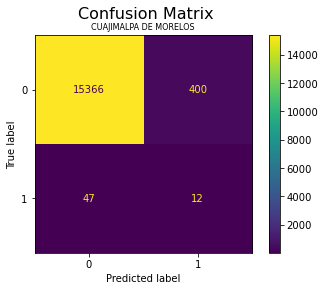

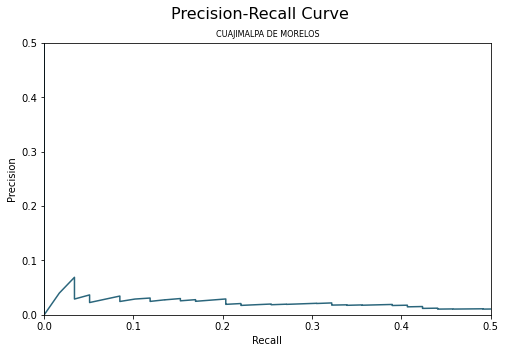

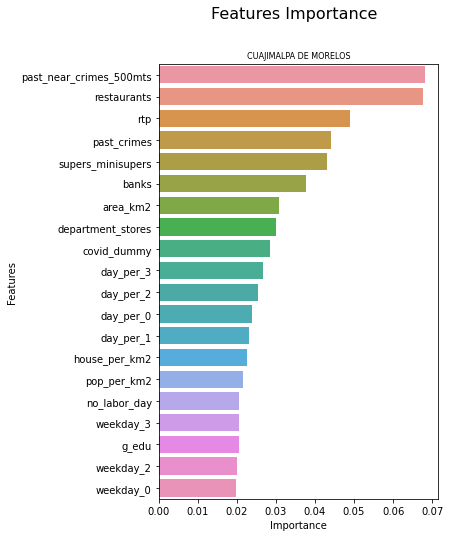

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------




In [8]:
## Loop for every Alcaldia (Municipality) and apply the model
alcaldias_list = colonias['alcaldi'].unique()

for alcaldia in alcaldias_list:
    
    ## Initialize the class model
    model = SplitTrainAndPredict(alcaldi=alcaldia, copy_df=matrix_crimes, colonias=colonias)

    ## Create tran-test splits
    X_train, X_test, y_train, y_test, save_columns, ind_test = model.train_test_df()

    ## Apply the model
    brf, predictions, crime_prob, threshold = model.fit_my_results(X_train, X_test, y_train, y_test)

    ## Show and save scores
    save_scores_df = model.show_my_results(y_test, crime_prob, predictions, threshold, brf, save_columns)

    ## Predict
    local_crimes_test = model.predict_crimes(X_test, ind_test, crime_prob, predictions, save_columns)

    ## Concat results
    results_brf = pd.concat([results_brf, local_crimes_test], ignore_index=True)
    all_scores = pd.concat([all_scores, save_scores_df], ignore_index=True)
    train_test_table = pd.concat([train_test_table, model.train_test_table], ignore_index=True)

In [9]:
if not os.path.isdir(create_path(r"df_results")):
    
    os.makedirs(create_path(r"df_results"))

## Save DataFrames results
results_brf.to_csv(create_path(r"df_results\results_brf.csv"), index=False)

all_scores.to_csv(create_path(r"df_results\all_scores.csv"), index=False)

train_test_table.to_csv(create_path(r"df_results\train_test_table.csv"), index=False)

## Finally, save a reduced form of the results DataFrame and Neighborhoods
reduced_results_brf = results_brf[['id_colonia', 'day_period', 'dia_semana', 'proba_crimen']]

reduced_results_brf.to_csv(create_path(r"df_results\reduced_results_brf.csv"), index=False)

reduced_colonias = colonias[['id_colonia', 'colonia', 'geometry']].copy()

reduced_colonias.to_csv(create_path(r"df_results\reduced_colonias.csv"), index=False)

In [10]:
results_brf = pd.read_csv(create_path(r"df_results\results_brf.csv"),low_memory=False,
                          parse_dates=['Hora'])

results_brf['geometry'] = gpd.GeoSeries.from_wkt(results_brf['geometry'])

results_brf = gpd.GeoDataFrame(results_brf, geometry='geometry')

Results of Balanced Random Forest:

   F1 Score: 0.07213605970646172
   Accuracy: 0.9498277734771154
   Balanced Accuracy: 0.5772484922695428
   Average Precision Score: 0.027673313823817523


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    659970
           1       0.04      0.20      0.07      6594

    accuracy                           0.95    666564
   macro avg       0.52      0.58      0.52    666564
weighted avg       0.98      0.95      0.97    666564

***************************


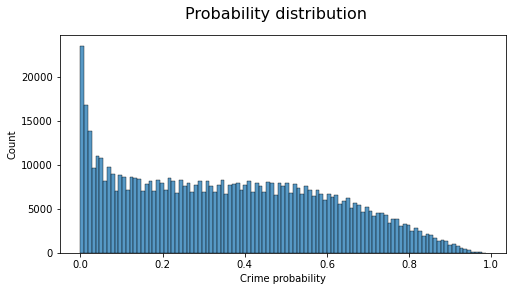

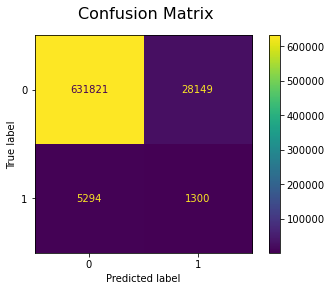

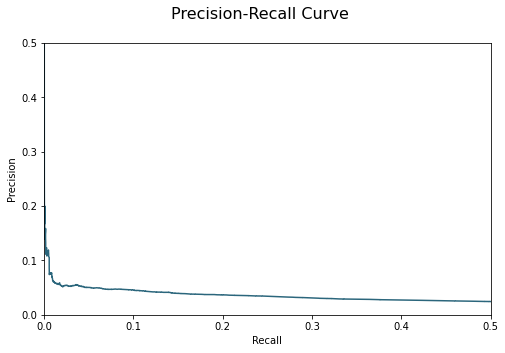

In [12]:
## Show aggregated results
model = SplitTrainAndPredict(copy_df=matrix_crimes, colonias=colonias, alcaldi="")


model.show_my_results(results_brf['crimen'], results_brf['proba_crimen'], results_brf['predictions'],
                      return_res_df=False)

### Probability analysis

In [13]:
summary, results = rp.ttest(group1= results_brf['proba_crimen'][results_brf['crimen'] == 1], group1_name= "Crime",
                            group2= results_brf['proba_crimen'][results_brf['crimen'] == 0], group2_name= "Non-Crime")
print(summary)


    Variable         N      Mean        SD        SE  95% Conf.  Interval
0      Crime    6594.0  0.572497  0.209671  0.002582   0.567435  0.577559
1  Non-Crime  659970.0  0.357488  0.242313  0.000298   0.356904  0.358073
2   combined  666564.0  0.359615  0.242945  0.000298   0.359032  0.360199


In [14]:
print(results)

                  Independent t-test      results
0  Difference (Crime - Non-Crime) =        0.2150
1              Degrees of freedom =   666562.0000
2                               t =       71.7852
3           Two side test p value =        0.0000
4          Difference < 0 p value =        1.0000
5          Difference > 0 p value =        0.0000
6                       Cohen's d =        0.8884
7                       Hedge's g =        0.8884
8                   Glass's delta =        1.0255
9                     Pearson's r =        0.0876


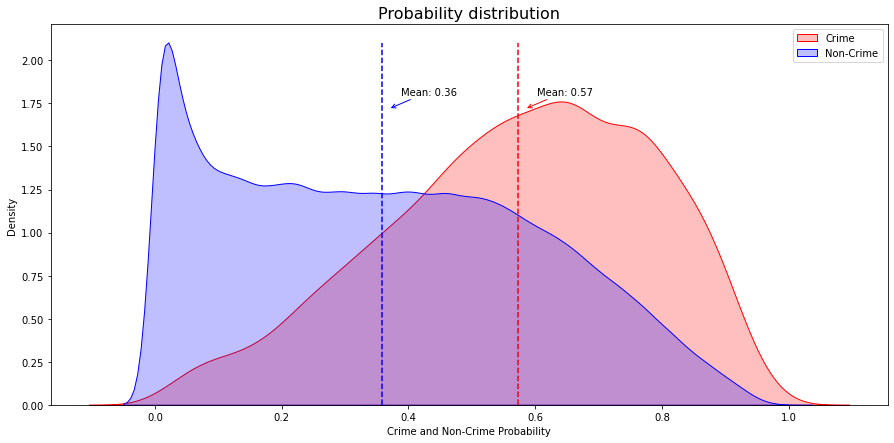

In [15]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.kdeplot(data=results_brf['proba_crimen'][results_brf['crimen'] == 1], shade=True, ax=ax,
               color='red')
b = sns.kdeplot(data=results_brf['proba_crimen'][results_brf['crimen'] == 0], shade=True, ax=ax,
               color='blue')       

plt.title('Probability distribution', fontdict={'fontsize': 16})

plt.xlabel('Crime and Non-Crime Probability')

plt.ylabel('Density')
plt.legend(labels=['Crime','Non-Crime'])

ax.axvline(x=results_brf['proba_crimen'][results_brf['crimen'] == 1].mean(), ymax=0.95, linestyle='--', color='red')
plt.annotate(
    'Mean: ' + '{:,.2f}'.format(results_brf['proba_crimen'][results_brf['crimen'] == 1].mean()),
    xy=(results_brf['proba_crimen'][results_brf['crimen'] == 1].mean(), 1.7),
    xytext=(results_brf['proba_crimen'][results_brf['crimen'] == 1].mean()+.03, 1.8),
    arrowprops=dict(arrowstyle='->', color='red', shrinkB=10))

ax.axvline(x=results_brf['proba_crimen'][results_brf['crimen'] == 0].mean(), ymax=0.95, linestyle='--', color='blue')

plt.annotate(
    'Mean: ' + '{:,.2f}'.format(results_brf['proba_crimen'][results_brf['crimen'] == 0].mean()),
    xy=(results_brf['proba_crimen'][results_brf['crimen'] == 0].mean(), 1.7),
    xytext=(results_brf['proba_crimen'][results_brf['crimen'] == 0].mean()+.03, 1.8),
    arrowprops=dict(arrowstyle='->', color='blue', shrinkB=10))

plt.show()

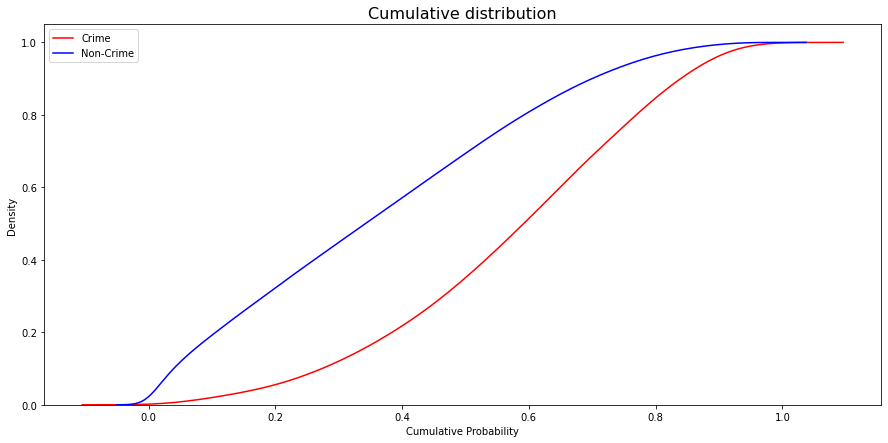

In [16]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.kdeplot(data=results_brf['proba_crimen'][results_brf['crimen'] == 1], ax=ax,
               color='red', cumulative=True)
b = sns.kdeplot(data=results_brf['proba_crimen'][results_brf['crimen'] == 0], ax=ax,
               color='blue', cumulative=True)       

plt.title('Cumulative distribution', fontdict={'fontsize': 16})

plt.xlabel('Cumulative Probability')

plt.ylabel('Density')
plt.legend(labels=['Crime','Non-Crime'])

plt.show()

In [17]:
results_brf_agg = results_brf.groupby(['id_colonia', 'colonia']).agg({'proba_crimen':['mean', 'median', 'std'], 
                                                                      'predictions':'mean',
                                                                      'crimen':'mean'}).reset_index()

results_brf_agg.columns = ['_'.join(col).strip() for col in results_brf_agg.columns.values]


In [18]:
results_brf_agg.sort_values(by='proba_crimen_mean', ascending=False).head(10)

,id_colonia_,colonia_,proba_crimen_mean,proba_crimen_median,proba_crimen_std,predictions_mean,crimen_mean
725,726,SAN PEDRO CUAJIMALPA (PBLO),0.883108,0.885000,0.046659,0.620596,0.029810
757,758,SANTIAGO TULYEHUALCO (PBLO),0.873603,0.880000,0.043311,0.756098,0.065041
1712,1715,TIZAPAN_TIZAPAN SAN ANGEL,0.871249,0.875000,0.045826,0.899457,0.024457
584,585,SAN JERONIMO ACULCO - LIDICE (PBLO),0.869721,0.880000,0.049594,0.685637,0.035230
803,804,MERCED GOMEZ,0.862942,0.886250,0.079919,0.782609,0.048913
201,202,JARDINES DEL PEDREGAL,0.862823,0.877083,0.064470,0.823370,0.035326
173,174,SAN MIGUEL TOPILEJO (PBLO),0.857341,0.865000,0.056374,0.699187,0.040650
215,216,PASEOS DE CHURUBUSCO,0.856599,0.860000,0.046365,0.897019,0.092141
849,850,TACUBA,0.856249,0.877500,0.072653,0.836898,0.141711
659,660,TLALPAN CENTRO,0.853663,0.875000,0.072252,0.734417,0.054201


In [19]:
results_brf.reset_index(level=0, inplace=True, drop=True)

results_brf_recall = results_brf[results_brf['crimen'] == 1].copy()

results_brf_recall = results_brf_recall.groupby(results_brf['Hora'].dt.date)[['predictions']].mean().reset_index()

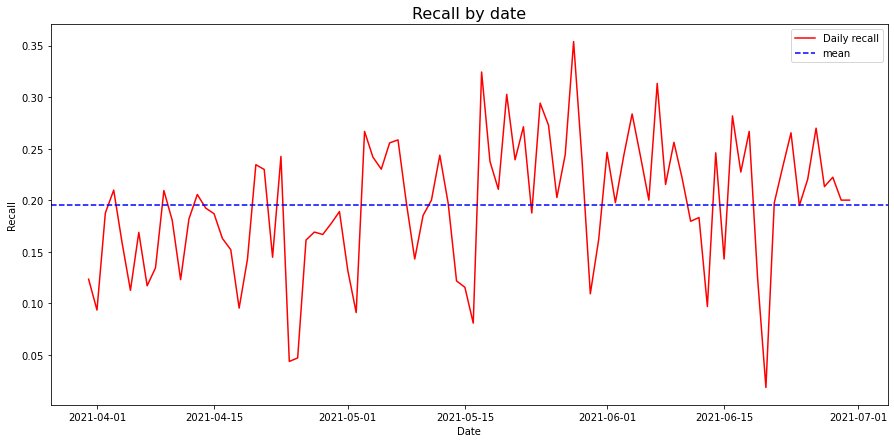

In [20]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.lineplot(data=results_brf_recall, y='predictions', x='Hora', ax=ax,
               color='red')

plt.title('Recall by date', fontdict={'fontsize': 16})

plt.xlabel('Date')

ax.axhline(y=results_brf_recall['predictions'].mean(), linestyle='--', color='blue')

plt.ylabel('Recall')
plt.legend(labels=['Daily recall', 'mean'])

plt.show()

In [21]:
results_brf_recall.groupby(results_brf['Hora'].dt.weekday)[['predictions']].mean().reset_index()

,Hora,predictions
0,0,0.229949
1,1,0.168219
2,2,0.204313
3,3,0.183514
4,4,0.205852
5,5,0.216441
6,6,0.158335


In [22]:
#https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/

#https://www.kaggle.com/prashant111/explain-your-model-predictions-with-shapley-values

#https://towardsdatascience.com/tagged/shapley-values

#https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html